# EDA Cine

## 1. Instalar paquetes

In [251]:
import pandas 
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import json
import numpy as np

## 2. Carga de datos

In [257]:
filename = './tmdb_5000_movies.csv'
filename2 = './tmdb_5000_credits.csv'
movies = pandas.read_csv(filename, header=0)
credit = pandas.read_csv(filename2, header=0)
data = movies.merge(credit, on = 'title')

## 3. Limpieza de base de datos

### 3.1. Descriptivos

In [227]:
print(data.shape)
print(data.head().transpose())



(4809, 23)
                                                                      0  \
budget                                                        237000000   
genres                [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
homepage                                    http://www.avatarmovie.com/   
id                                                                19995   
keywords              [{"id": 1463, "name": "culture clash"}, {"id":...   
original_language                                                    en   
original_title                                                   Avatar   
overview              In the 22nd century, a paraplegic Marine is di...   
popularity                                                   150.437577   
production_companies  [{"name": "Ingenious Film Partners", "id": 289...   
production_countries  [{"iso_3166_1": "US", "name": "United States o...   
release_date                                                 2009-12-10   
revenue       

In [258]:
print(data.dtypes) 
#print(data["spoken_languages"])
print(data["release_date"])

budget                    int64
genres                   object
homepage                 object
id                        int64
keywords                 object
original_language        object
original_title           object
overview                 object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                   int64
runtime                 float64
spoken_languages         object
status                   object
tagline                  object
title                    object
vote_average            float64
vote_count                int64
movie_id                  int64
cast                     object
crew                     object
dtype: object
0       2009-12-10
1       2007-05-19
2       2015-10-26
3       2012-07-16
4       2012-03-07
           ...    
4804    1992-09-04
4805    2011-12-26
4806    2013-10-13
4807    2012-05-03
4808    2005-08-05
Name: release_date, Length: 4809, dtype: 

Los data type concuerdan con el tipo de dato que quieren mostrar

### 3.2. Nulos y Duplicados

In [229]:
print(data.isnull().sum()) #hay nulos
print("La cantidad de duplicados es:" , data.duplicated().sum())  #no hay duplicados

budget                     0
genres                     0
homepage                3096
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
movie_id                   0
cast                       0
crew                       0
dtype: int64
La cantidad de duplicados es: 0


### 3.3. Limpieza de Nulos

In [259]:
dataClean = data
dataClean['homepage'].fillna('null',inplace= True) #ambos son strings no pasa nada si no tienen este campo
dataClean['tagline'].fillna('null',inplace= True) 
dataClean['overview'].fillna('null',inplace= True)
dataClean['runtime'].fillna(0,inplace= True)
dataClean['release_date'].fillna( '2009-12-10',inplace= True)
#elimino las filas de los que tienen nulos y no son significativos, en este caso 2 filas de release_date y 1 de runtime NOOOO HACES TREMENDO QUILOMBO CON LOS INDICES
#dataClean.dropna(inplace= True)
print(dataClean.isnull().sum())

budget                  0
genres                  0
homepage                0
id                      0
keywords                0
original_language       0
original_title          0
overview                0
popularity              0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 0
spoken_languages        0
status                  0
tagline                 0
title                   0
vote_average            0
vote_count              0
movie_id                0
cast                    0
crew                    0
dtype: int64


Se puede ver que hay datos nulos, no hay duplicados y los tipos de datos concuerdan con lo que expresa la columna


### 3.4 Conversion de tipo de dato

#### 3.4.1 Convierto las fechas en objetos datetime

In [260]:
dataClean["release_date"] = pandas.to_datetime(dataClean["release_date"]) 

#### 3.4.2 Convierto los objetos que corresponen a listas de diccionarios en listas de diccionarios, porque actualmente se estan leyendo como un string

In [261]:


#Transformo
def transformo(columna):
    transformada=[]
    for i in columna:
        transformada.append(list(eval(i)))
    return transformada

columnasDiccionario = ['genres', 'keywords', 'production_companies' , 'production_countries', 'spoken_languages', 'cast', 'crew']
for d in columnasDiccionario:
    dataClean[d] = transformo(dataClean[d]) 

#obs si lo corres denuevo se rompe pq le entran diccionarios a eval() y no strings

In [233]:
#chequeo
print(dataClean['genres'][0][1]['name'])
print(dataClean['production_companies'][0][1]['name'])

Adventure
Twentieth Century Fox Film Corporation


### 3.5 Funciones para moldear los datos para facilitar los graficos

#### 3.5.1 Armo un vector con el conjunto de todos los objetos de cierta columna y con cierta key

In [264]:
def conjuntoVector(columnaObjetos, nombreString):
    ConjuntoNombreString = []
    for i in columnaObjetos:
        for j in i:
            ConjuntoNombreString.append(j[nombreString])
    return ConjuntoNombreString


In [ ]:
#pruebo
print(conjuntoVector(dataClean['production_companies'], 'name' ))

#### 3.5.2 Armo un vector con los valores unicos de un conjunto de todos los objetos de cierta columna y con cierta key

In [265]:
def conjuntoUnico(conjuntoVector):
    ConjuntoUnico = []
    for i in conjuntoVector: 
        if i not in ConjuntoUnico: 
            ConjuntoUnico.append(i)
    return ConjuntoUnico 


In [ ]:
#print(conjuntoUnico(conjuntoVector(dataClean['production_companies'], 'name' )))
print(conjuntoUnico(conjuntoVector(dataClean['production_countries'], 'name' )))

#### 3.5.3 Armo un vector con la cantidad de veces que aparece cada valor unico de un conjunto de todos los objetos de cierta columna y con cierta key

In [266]:
def contador(conjuntoUnico1, conjuntoVector1):
    ContadorVector1=[]
    for x in conjuntoUnico1:
        contador1 = 0
        for w in conjuntoVector1:
            if w==x:
                contador1 = contador1 +1
        ContadorVector1.append(contador1)   
    return ContadorVector1




In [ ]:
print(contador(conjuntoUnico(conjuntoVector(dataClean['production_countries'], 'name' )), conjuntoVector(dataClean['production_countries'], 'name' )))

#### 3.5.4 Armo una matriz con los valores unicos de objetos de una columna para cierto key y con la cantidad de veces que aparece ese valor unico

In [267]:
def packMatriz(columnaObjetos1, nombreString1):
    x = conjuntoUnico(conjuntoVector(columnaObjetos1 , nombreString1))
    y = contador(conjuntoUnico(conjuntoVector(columnaObjetos1 , nombreString1)), conjuntoVector(columnaObjetos1 , nombreString1) )
    matriz = np.column_stack((x, y))

    return matriz


def xMatriz(packMatriz):
    x = [a[0] for a in packMatriz]
    return x
def yMatriz(packMatriz):
    y = [a[1] for a in packMatriz]
    res = [eval(p) for p in y]
    return res
    

In [269]:
#pruebo
print(conjuntoUnico(conjuntoVector(dataClean['genres'], 'name')))
#print(contador(conjuntoUnico(conjuntoVector(dataClean['genres'], 'name')), conjuntoVector(dataClean['genres'], 'name')))
#print(packMatriz(dataClean['genres'], 'name'))
#print(xMatriz(packMatriz(dataClean['genres'], 'name')))
print(packMatriz(dataClean['production_countries'], 'name'))


['Action', 'Adventure', 'Fantasy', 'Science Fiction', 'Crime', 'Drama', 'Thriller', 'Animation', 'Family', 'Western', 'Comedy', 'Romance', 'Horror', 'Mystery', 'History', 'War', 'Music', 'Documentary', 'Foreign', 'TV Movie']
[['United States of America' '3959']
 ['United Kingdom' '637']
 ['Jamaica' '2']
 ['Bahamas' '4']
 ['Dominica' '1']
 ['Czech Republic' '24']
 ['Poland' '6']
 ['Slovenia' '2']
 ['New Zealand' '29']
 ['Germany' '324']
 ['China' '59']
 ['Canada' '262']
 ['Italy' '72']
 ['Japan' '58']
 ['Malta' '4']
 ['Australia' '110']
 ['France' '306']
 ['Belgium' '25']
 ['India' '54']
 ['Netherlands' '18']
 ['Spain' '71']
 ['United Arab Emirates' '14']
 ['Hong Kong' '48']
 ['Taiwan' '5']
 ['Ireland' '37']
 ['Morocco' '4']
 ['Hungary' '13']
 ['Singapore' '2']
 ['Norway' '14']
 ['Sweden' '19']
 ['South Africa' '20']
 ['Russia' '19']
 ['Romania' '12']
 ['Mexico' '30']
 ['Monaco' '1']
 ['Switzerland' '19']
 ['Pakistan' '3']
 ['Malaysia' '2']
 ['Finland' '5']
 ['Iceland' '6']
 ['Denmark' 

#### 3.5.5 Armo una matriz con los objetos de una columna  cierto key con su correspondiente valor de revenue

In [270]:
def revenueMatriz(columnaObjeto, columnaRevenueOriginal, keystring):
    columnaRevenue = columnaRevenueOriginal
    ConjuntoNombreString1 = []
    RevenueNombreString1= [] 
    indice = 0 
    for k in columnaRevenue: 
        for i in columnaObjeto[indice]:
                ConjuntoNombreString1.append(i[keystring])
                RevenueNombreString1.append(k)
        indice = indice + 1          
    return np.column_stack((ConjuntoNombreString1, RevenueNombreString1))
    

In [271]:
#prueba
#print(revenueMatriz(dataClean['genres'], dataClean['revenue'], 'name'))
#print(dataClean['production_countries'][0])
print(revenueMatriz(dataClean['production_countries'], dataClean['revenue'], 'name'))

[['United States of America' '2787965087']
 ['United Kingdom' '2787965087']
 ['United States of America' '961000000']
 ...
 ['United States of America' '0']
 ['China' '0']
 ['United States of America' '0']]


#### 3.5.6 Armo una matriz con los objetos unicos de una columna  para cierto key con su correspondiente valor promedio y total de revenue

In [272]:
def promedioPorObjetoUnico(matrizrevenue):
    xnombre = [a[0] for a in matrizrevenue]
    vectorUnico = conjuntoUnico(xnombre)
    revenueTotal = []
    promedioTotal = []
    for k in vectorUnico:
        contadorrevenue=0
        contador = 0
        for n in range(len(matrizrevenue[:,0])):
            if k == matrizrevenue[n,0]:
                contadorrevenue = contadorrevenue + int(matrizrevenue[n,1])
                contador = contador + 1
        revenueTotal.append(contadorrevenue)
        promedioTotal.append((contadorrevenue / contador))
    
    return np.column_stack((vectorUnico, promedioTotal))



In [282]:
def TotalPorObjetoUnico(matrizrevenue):
    xnombre = [a[0] for a in matrizrevenue]
    vectorUnico = conjuntoUnico(xnombre)
    revenueTotal = []
    for k in vectorUnico:
        contadorrevenue=0
        for n in range(len(matrizrevenue[:,0])):
            if k == matrizrevenue[n,0]:
                contadorrevenue = contadorrevenue + int(matrizrevenue[n,1])
        revenueTotal.append(contadorrevenue)
    return np.column_stack((vectorUnico, revenueTotal))

(x, y) donde y es revenue promedio y x es el objeto

In [ ]:
#pruebo
#print(promedioPorObjetoUnico(revenueMatriz(dataClean['genres'], dataClean['revenue'], 'name')))

print(promedioPorObjetoUnico(revenueMatriz(dataClean['production_countries'], dataClean['revenue'], 'name')))
print(TotalPorObjetoUnico(revenueMatriz(dataClean['production_countries'], dataClean['revenue'], 'name')))

#### 3.5.7 Ordenar la matriz de mayor a menor los n primeros

In [ ]:
#print(sorted(promedioPorObjetoUnico(revenueMatriz(dataClean['production_countries'], dataClean['revenue'], 'name'))[:,1]))
print(isinstance(promedioPorObjetoUnico(revenueMatriz(dataClean['production_countries'], dataClean['revenue'], 'name'))[0,1], str))
res = [eval(j) for j in promedioPorObjetoUnico(revenueMatriz(dataClean['production_countries'], dataClean['revenue'], 'name'))[:,1] ]
sorted(res, reverse = True)

Ojo que los datos eran string, hay que cambiar para usar el sorted()

In [246]:
def ordenar(matriz, n ):
    matrizcopia = matriz
    vectorordenadoint =sorted([eval(j) for j in matriz[:,1]], reverse =True)
    matrizordenada = []
    for q in range(n):
        for g in range(len(matrizcopia[:,0])):
            if eval(matrizcopia[g,1]) == vectorordenadoint[q]:
                matrizordenada.append(matriz[g])
    return matrizordenada
    
       


In [247]:
#pruebo
#print(ordenar(promedioPorObjetoUnico(revenueMatriz(dataClean['production_countries'], dataClean['revenue'], 'name')),10))
print(xMatriz(ordenar(promedioPorObjetoUnico(revenueMatriz(dataClean['production_countries'], dataClean['revenue'], 'name')), 10)))
print(yMatriz(ordenar(promedioPorObjetoUnico(revenueMatriz(dataClean['production_countries'], dataClean['revenue'], 'name')), 10)))

['Dominica', 'Jamaica', 'Malta', 'Bahamas', 'New Zealand', 'Taiwan', 'Slovenia', 'Philippines', 'Peru', 'Czech Republic']
[1065659812.0, 562629906.0, 466626670.25, 303593586.5, 287091184.0344828, 271225069.2, 209825706.5, 203277636.0, 153624174.5, 130144843.875]


## 4. Analisis

El plan es ver que variables influyen en el revenue

### 4.1 Revenue vs Budget 


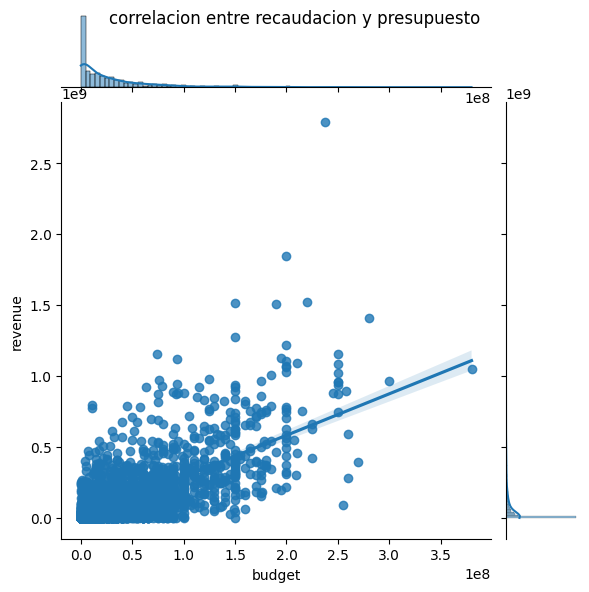

Correlacion entre recaudacion y presupuesto :  0.7305843093919155


C:\Users\alejandro\AppData\Local\Temp\ipykernel_6012\3428538624.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacion = dataClean.corr()


In [248]:
fig2 = sns.jointplot(x = "budget", y = "revenue", kind = "reg", data = dataClean)
fig2.fig.suptitle('correlacion entre recaudacion y presupuesto');
plt.show()
#Ver como achicar los puntos (queda desprolijo)
correlacion = dataClean.corr()
print("Correlacion entre recaudacion y presupuesto : ",correlacion.loc['revenue','budget'])

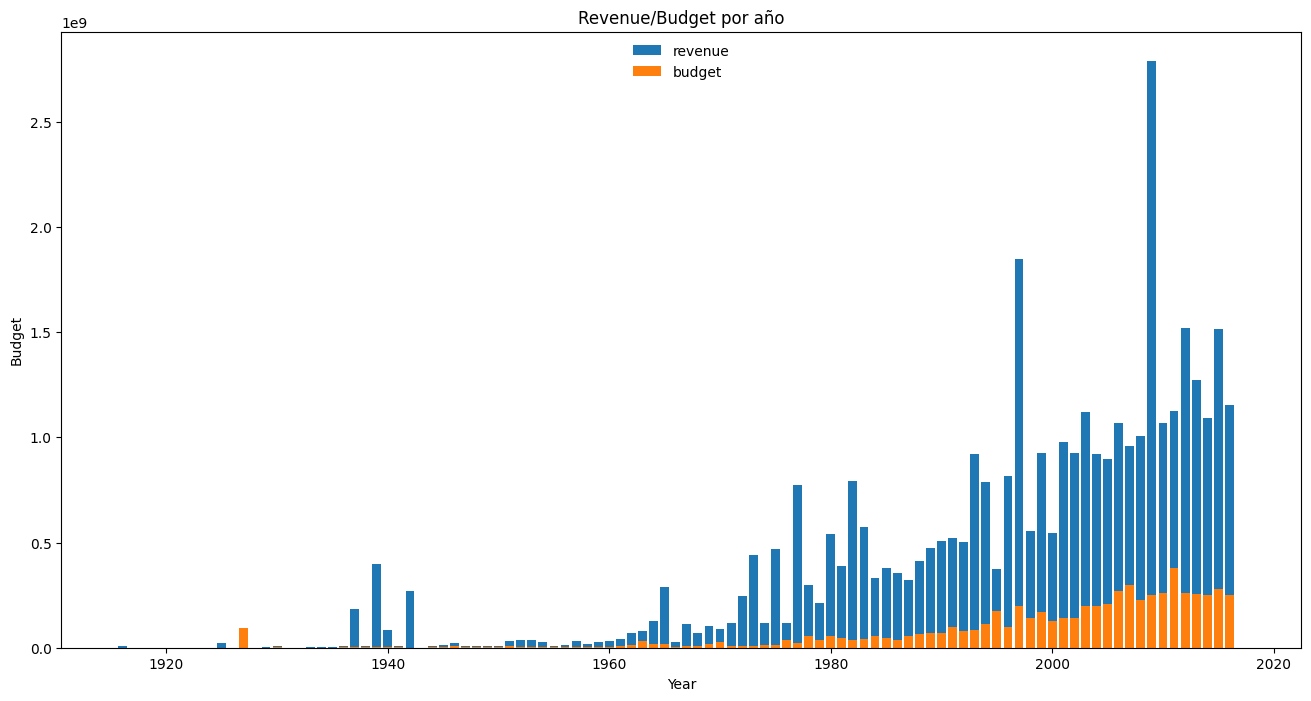

In [255]:
plt.figure(figsize=(16, 8))
plt.bar(dataClean["release_date"].dt.year, dataClean['revenue'], label='revenue')
plt.bar(dataClean["release_date"].dt.year, dataClean['budget'], label='budget')
plt.title('Revenue/Budget por año')
plt.xlabel('Year')
plt.ylabel('Budget')
plt.legend(loc='upper center', frameon=False)
plt.show()

### 4.2 Revenue vs Genres

[1156, 792, 425, 538, 697, 2300, 1275, 234, 514, 82, 1723, 895, 520, 348, 197, 144, 185, 110, 34, 8]
['Action', 'Adventure', 'Fantasy', 'Science Fiction', 'Crime', 'Drama', 'Thriller', 'Animation', 'Family', 'Western', 'Comedy', 'Romance', 'Horror', 'Mystery', 'History', 'War', 'Music', 'Documentary', 'Foreign', 'TV Movie']


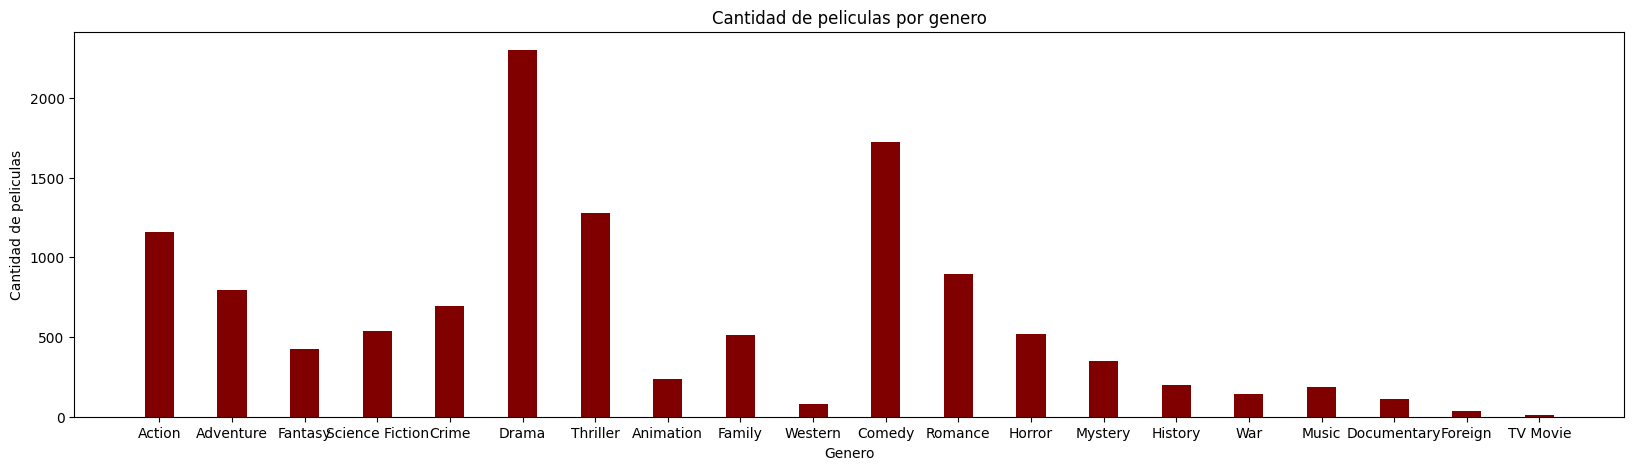

In [262]:
print(yMatriz(packMatriz(dataClean['genres'], 'name')))
print(xMatriz(packMatriz(dataClean['genres'], 'name')))
fig = plt.figure(figsize = (20, 5))
plt.bar(xMatriz(packMatriz(dataClean['genres'], 'name')), yMatriz(packMatriz(dataClean['genres'], 'name')), color ='maroon',
        width = 0.4)
plt.xlabel("Genero")
plt.ylabel("Cantidad de peliculas")
plt.title("Cantidad de peliculas por genero")
plt.show()

[141379403.66782007, 208213243.37373737, 193867173.76235294, 151888573.58550185, 66055754.2123386, 52086727.66391304, 81030394.87843138, 225693025.06410256, 162029647.2548638, 46245964.76829268, 71248123.97446315, 60006105.86145251, 43631508.28076923, 78300927.47413793, 57523562.09137056, 84155874.38194445, 48455951.77297297, 9838887.981818182, 364651.5, 0.0]
['Action', 'Adventure', 'Fantasy', 'Science Fiction', 'Crime', 'Drama', 'Thriller', 'Animation', 'Family', 'Western', 'Comedy', 'Romance', 'Horror', 'Mystery', 'History', 'War', 'Music', 'Documentary', 'Foreign', 'TV Movie']


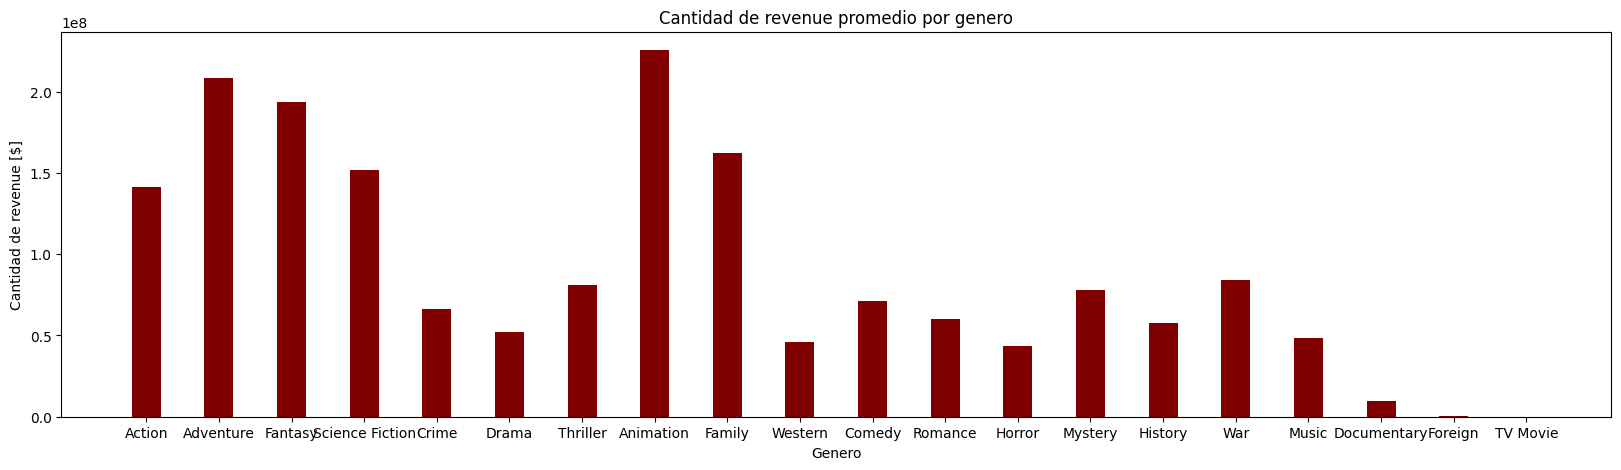

In [263]:
print(yMatriz(promedioPorObjetoUnico(revenueMatriz(dataClean['genres'], dataClean['revenue'], 'name'))))
print(xMatriz(promedioPorObjetoUnico(revenueMatriz(dataClean['genres'], dataClean['revenue'], 'name'))))
fig = plt.figure(figsize = (20, 5))
plt.bar(xMatriz(promedioPorObjetoUnico(revenueMatriz(dataClean['genres'], dataClean['revenue'], 'name'))), yMatriz(promedioPorObjetoUnico(revenueMatriz(dataClean['genres'], dataClean['revenue'], 'name'))), color ='maroon',
        width = 0.4)
plt.xlabel("Genero")
plt.ylabel("Cantidad de revenue [$]")
plt.title("Cantidad de revenue promedio por genero")
plt.show()

### 4.3 Revenue vs Popularity

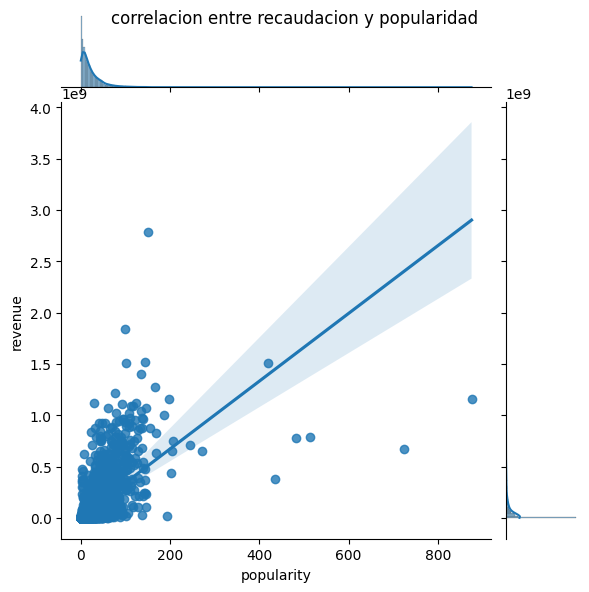

Correlacion entre recaudacion y popularidad :  0.6446546287006752


C:\Users\faust\AppData\Local\Temp\ipykernel_15224\2995783276.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacion = dataClean.corr()


In [ ]:
fig1 = sns.jointplot(x = "popularity", y = "revenue", kind = "reg", data = dataClean)
fig1.fig.suptitle('correlacion entre recaudacion y popularidad');
plt.show()

correlacion = dataClean.corr()
print("Correlacion entre recaudacion y popularidad : ",correlacion.loc['revenue','popularity'])



### 4.4 Revenue vs Production Companies

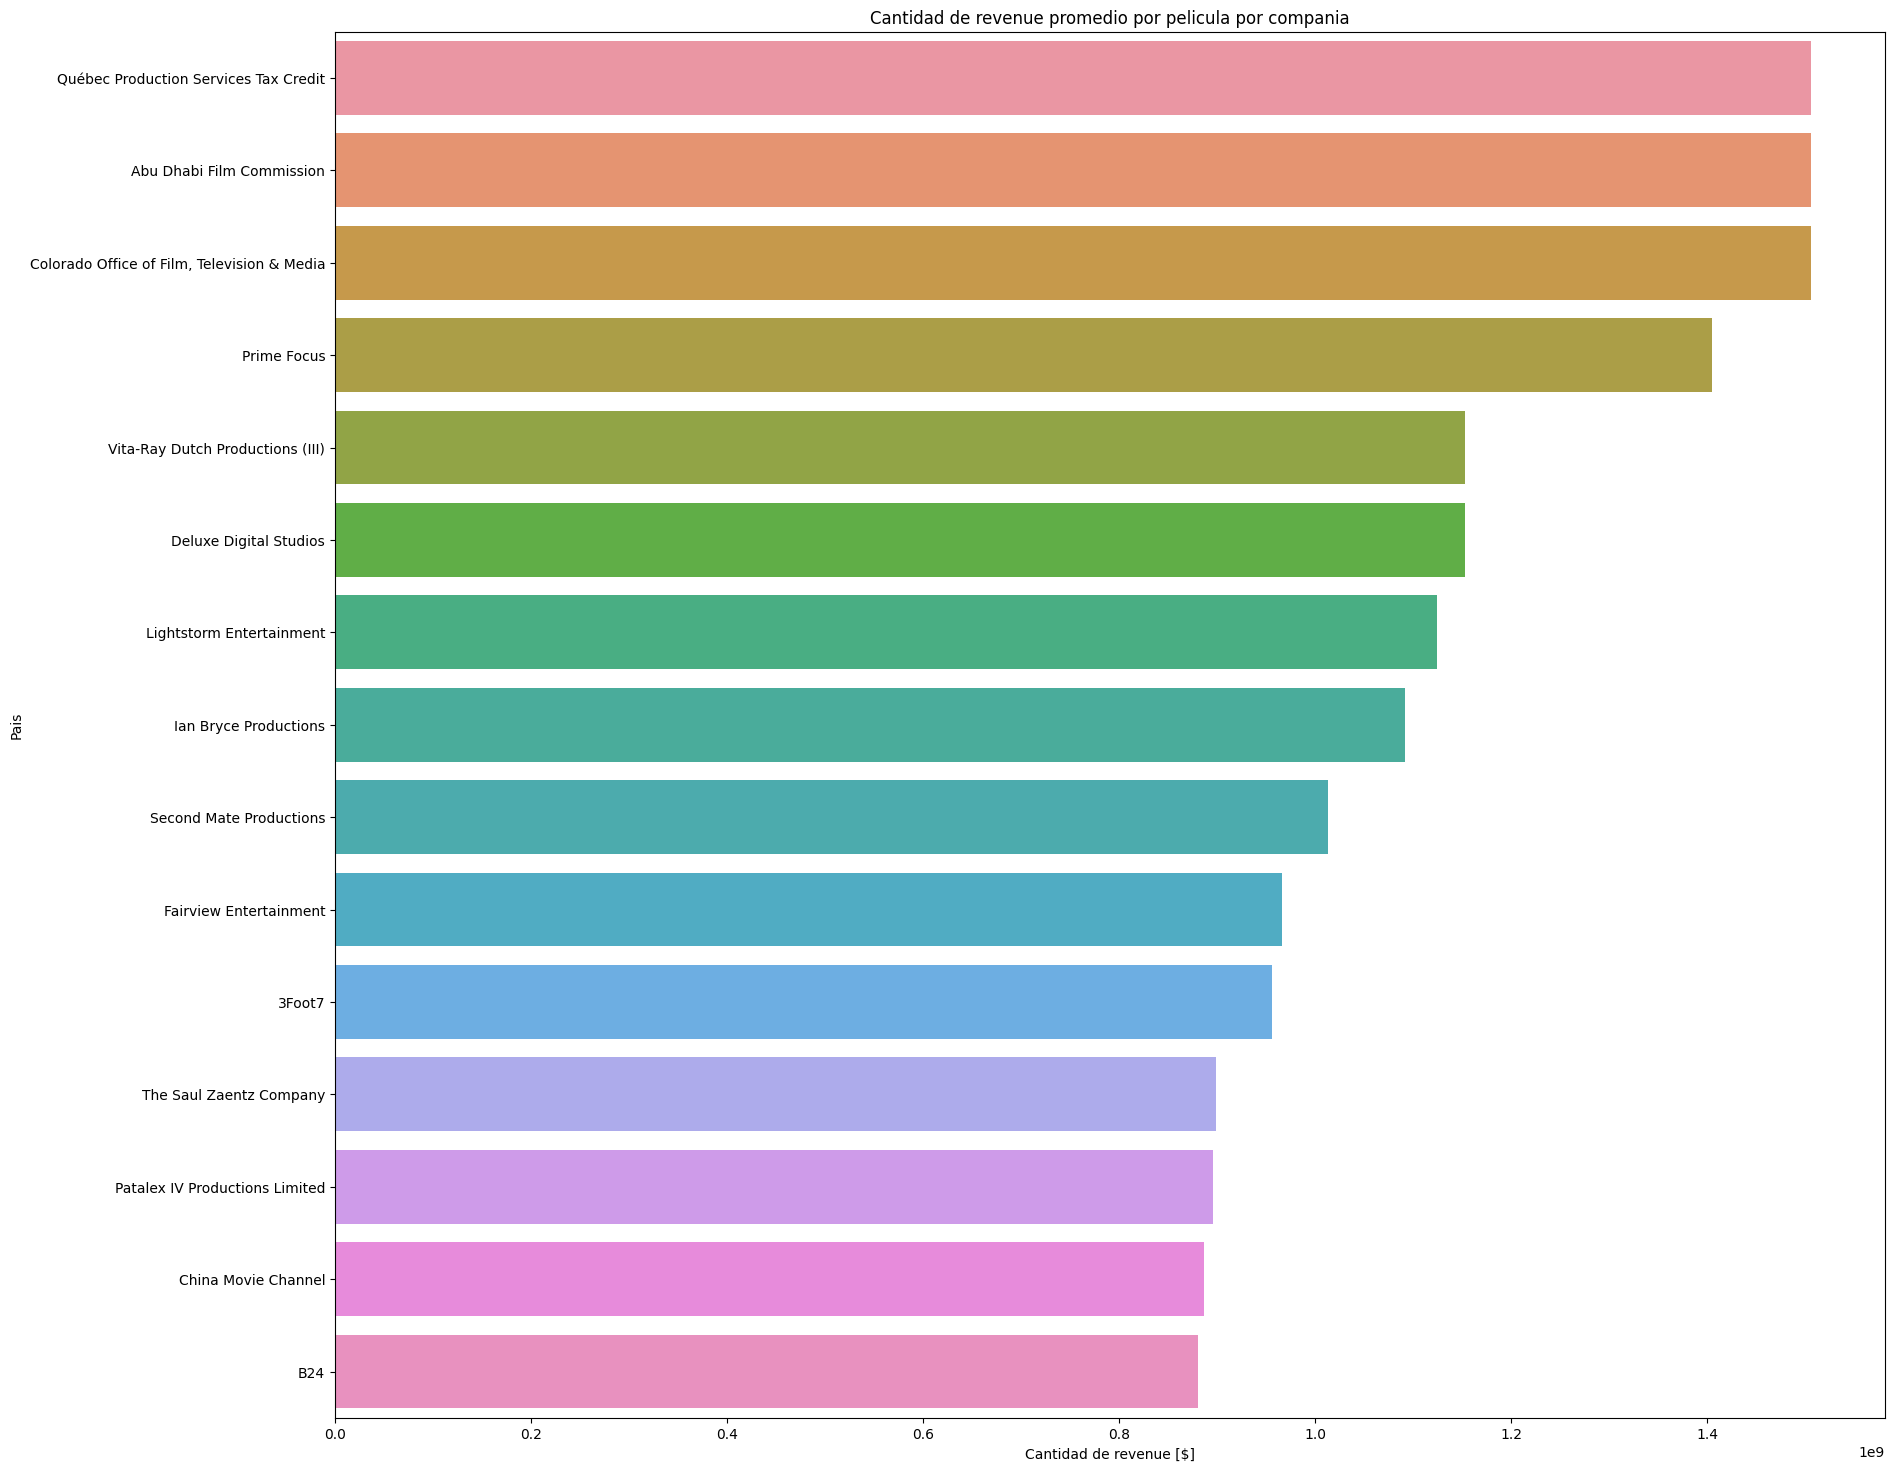

In [254]:
figure(num=None, figsize=(20,18))
sns.barplot(y= xMatriz(ordenar(promedioPorObjetoUnico(revenueMatriz(dataClean['production_companies'], dataClean['revenue'], 'name')), 15)), x = yMatriz(ordenar(promedioPorObjetoUnico(revenueMatriz(dataClean['production_companies'], dataClean['revenue'], 'name')),15)))
plt.xlabel("Cantidad de revenue [$]")
plt.ylabel("Compania")
plt.title("Cantidad de revenue promedio por pelicula por compania")
plt.show()

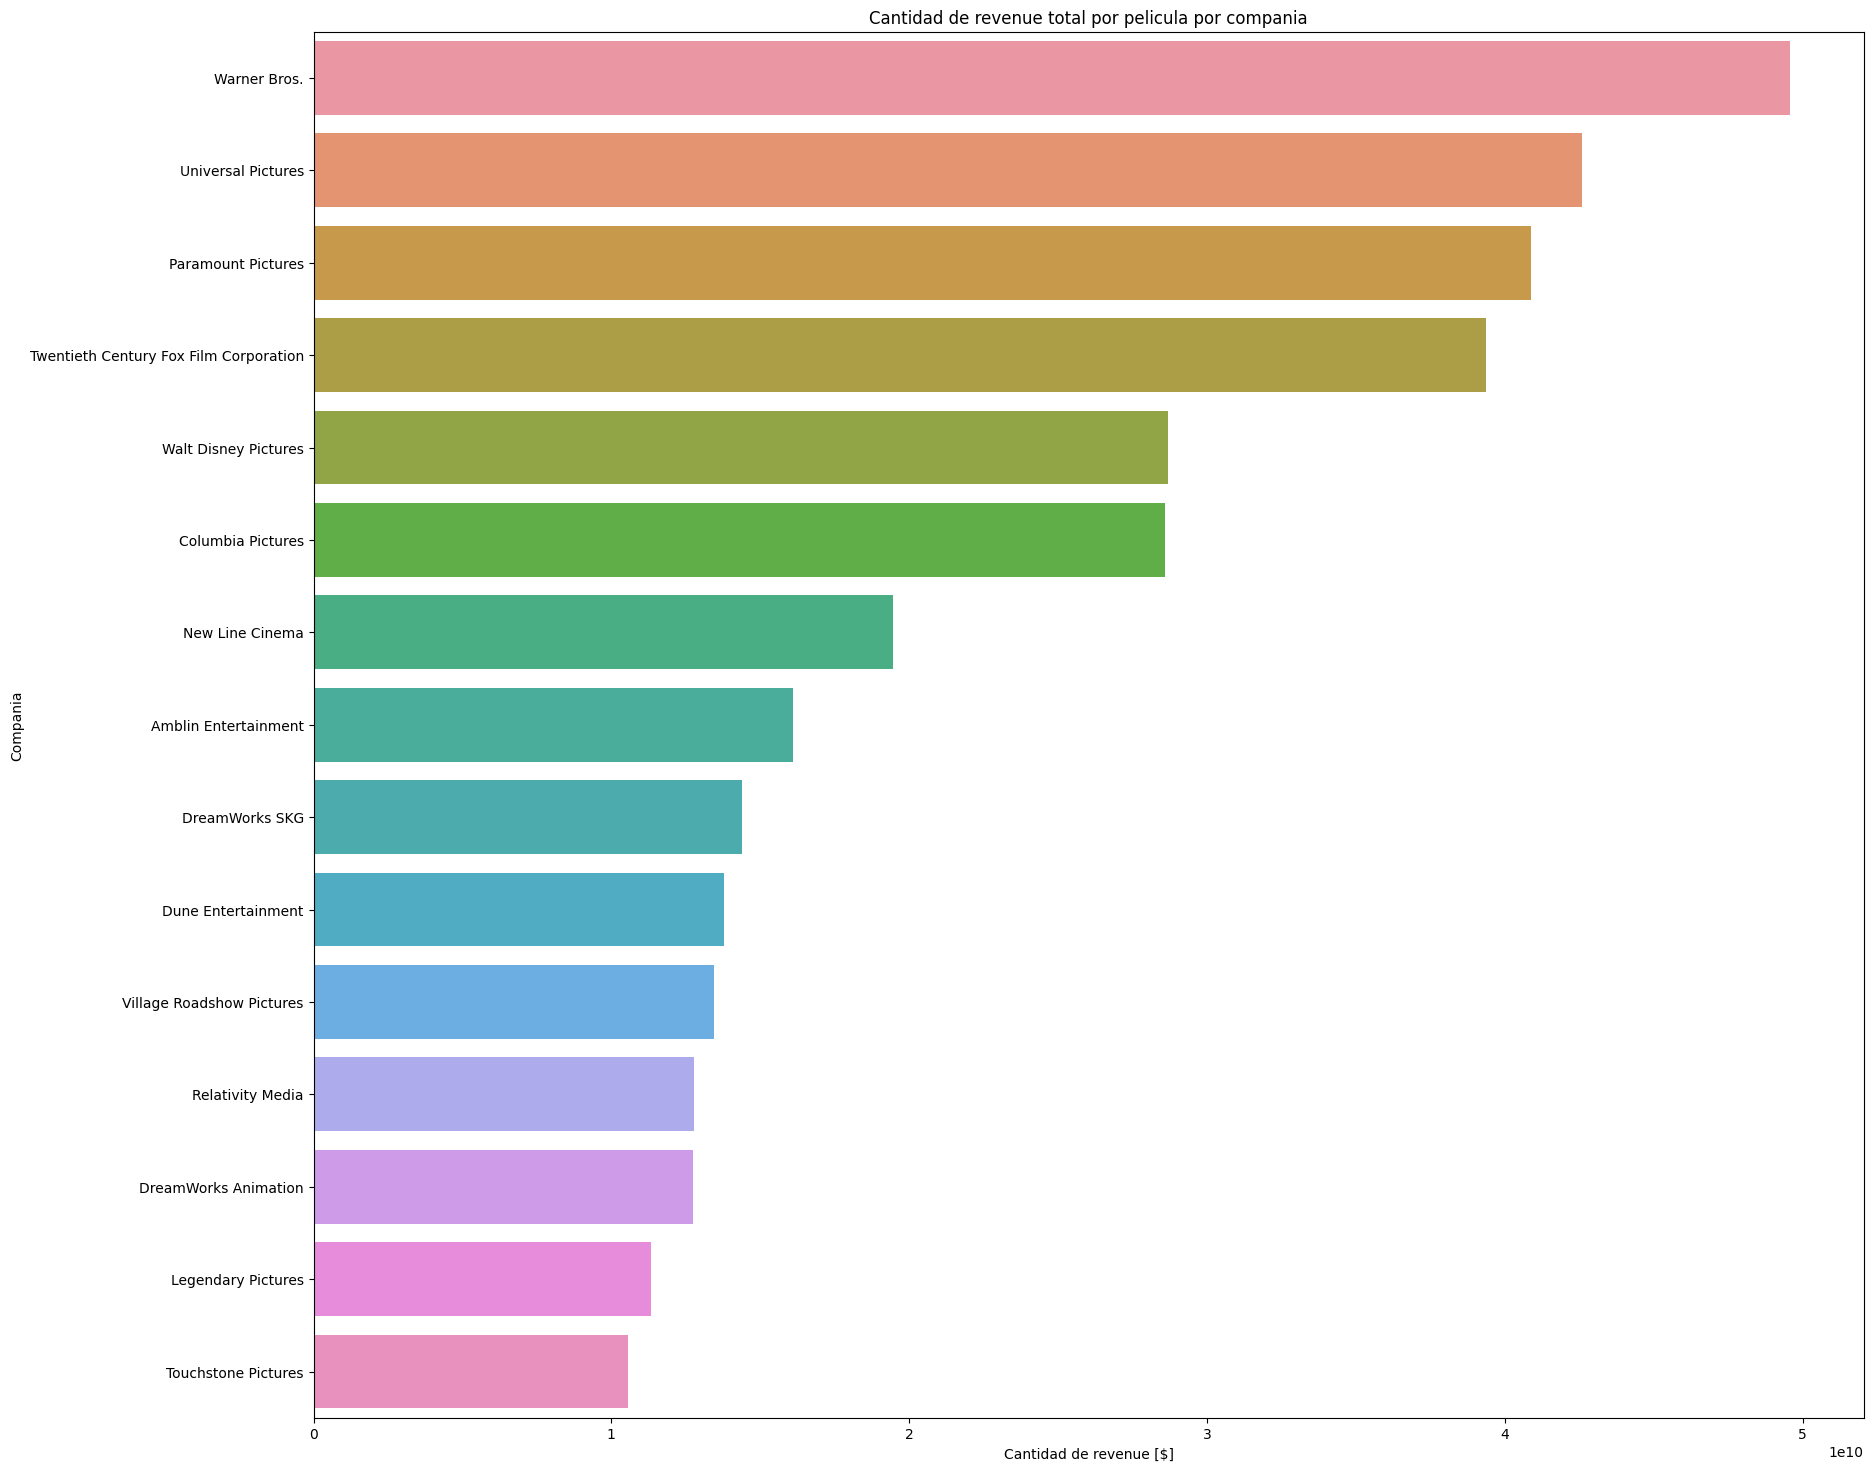

In [284]:
figure(num=None, figsize=(20,18))
sns.barplot(y= xMatriz(ordenar(TotalPorObjetoUnico(revenueMatriz(dataClean['production_companies'], dataClean['revenue'], 'name')), 15)), x = yMatriz(ordenar(TotalPorObjetoUnico(revenueMatriz(dataClean['production_companies'], dataClean['revenue'], 'name')),15)))
plt.xlabel("Cantidad de revenue [$]")
plt.ylabel("Compania")
plt.title("Cantidad de revenue total por compania")
plt.show()

### 4.5 Revenue vs Production Countries

Cantidad de revenue promedio por pelicula por pais

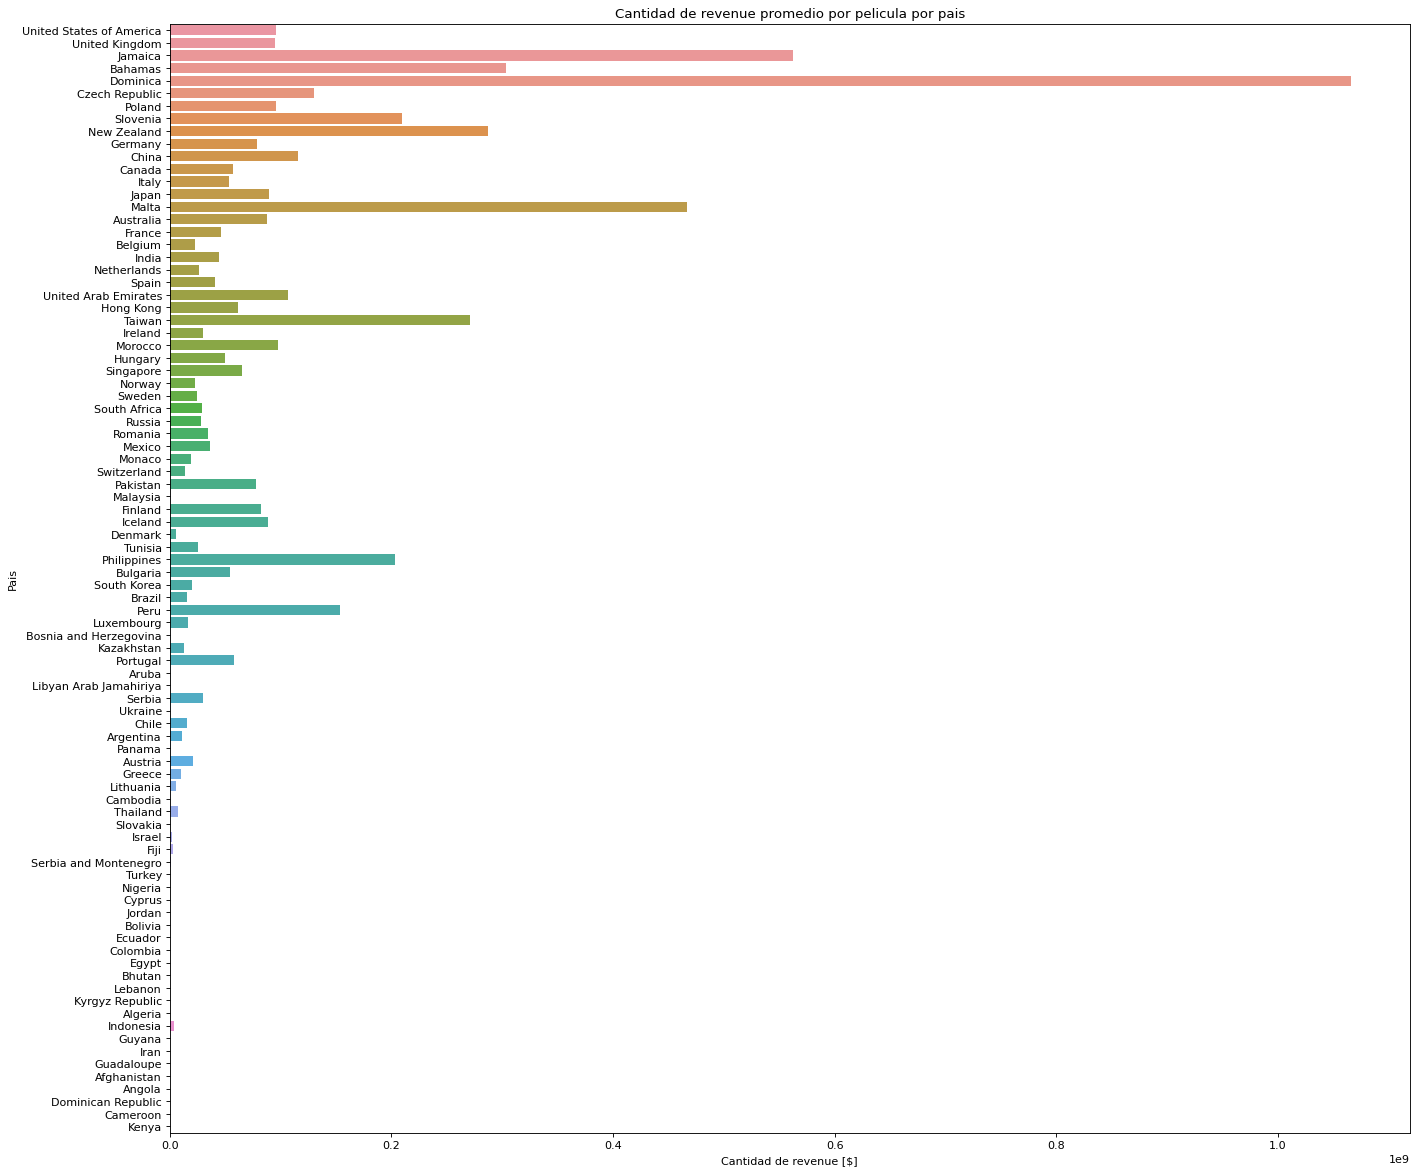

In [ ]:

figure(num=None, figsize=(20,18), dpi=80, facecolor='w', edgecolor='r')
sns.barplot(y= xMatriz(promedioPorObjetoUnico(revenueMatriz(dataClean['production_countries'], dataClean['revenue'], 'name'))), x = yMatriz(promedioPorObjetoUnico(revenueMatriz(dataClean['production_countries'], dataClean['revenue'], 'name'))))
plt.xlabel("Cantidad de revenue [$]")
plt.ylabel("Pais")
plt.title("Cantidad de revenue promedio por pelicula por pais")
plt.show()

Cantidad de peliculas por pais

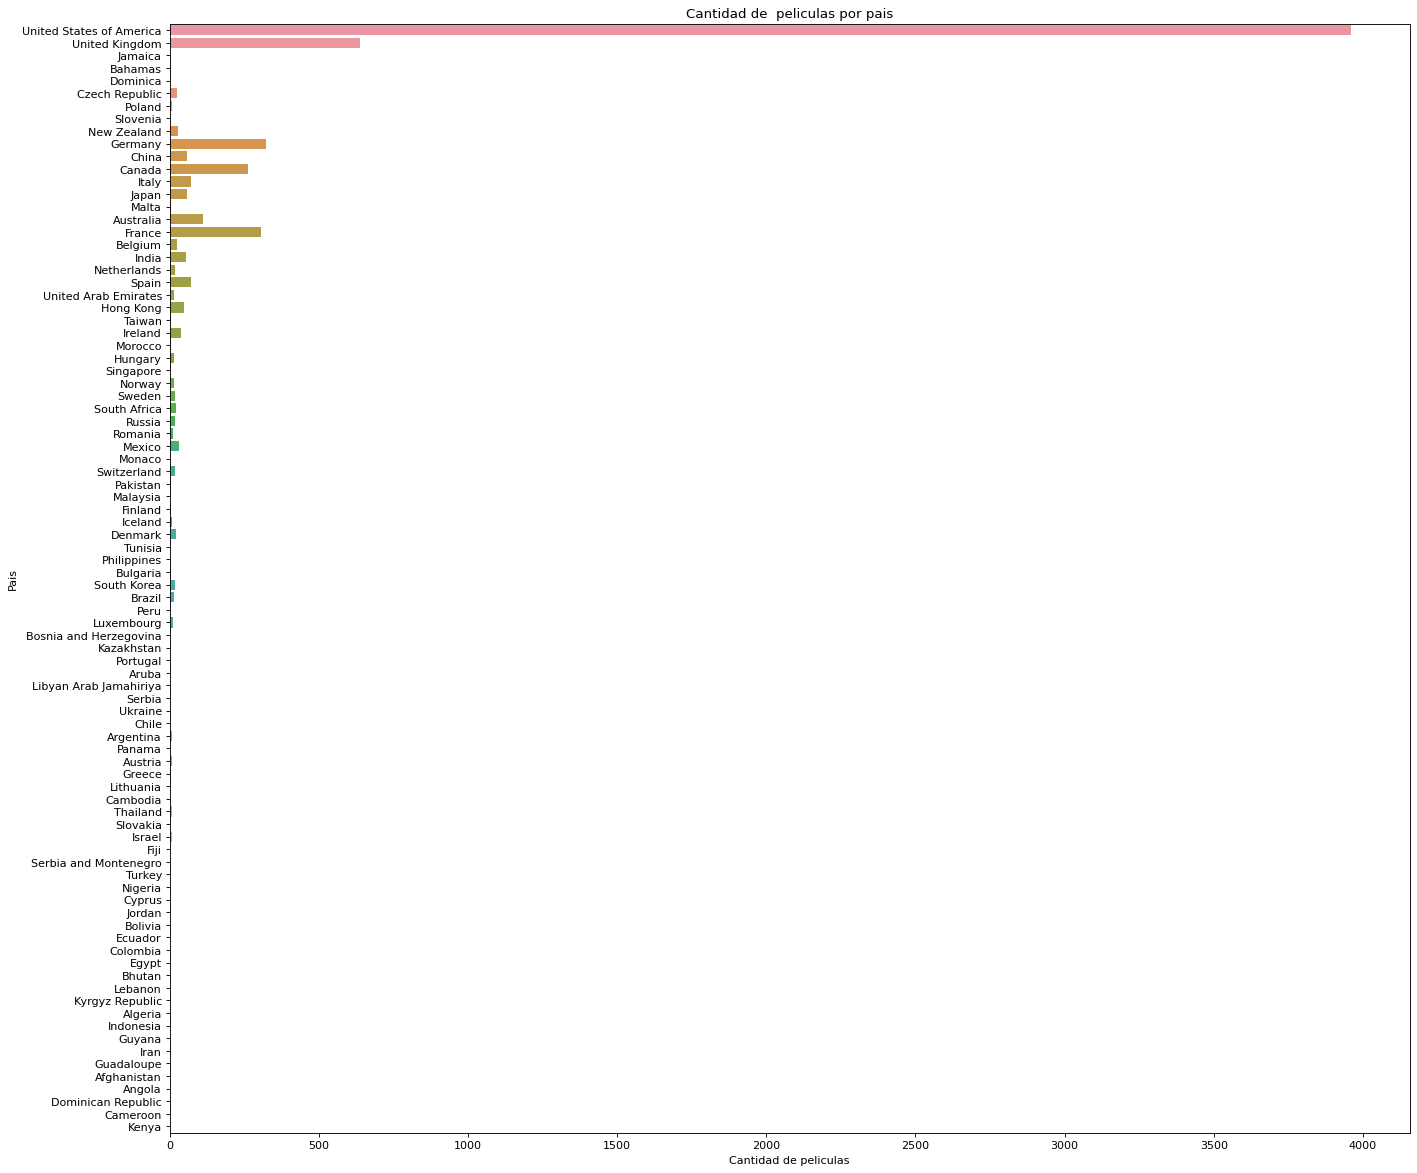

In [ ]:
figure(num=None, figsize=(20,18), dpi=80, facecolor='w', edgecolor='r')
sns.barplot(y= xMatriz(packMatriz(dataClean['production_countries'], 'name')), x = yMatriz(packMatriz(dataClean['production_countries'], 'name')))
plt.xlabel("Cantidad de peliculas")
plt.ylabel("Pais")
plt.title("Cantidad de  peliculas por pais")
plt.show()



### 4.6 Revenue vs Runtime

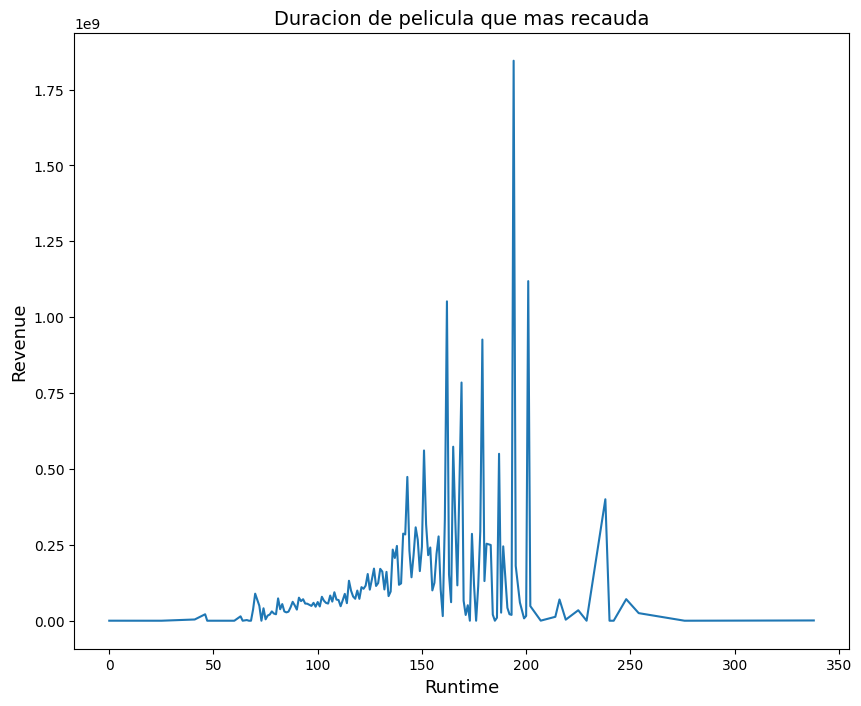

Duracion de pelicula que mas recauda: 194.0 minutos.


In [ ]:
run_rev=dataClean.groupby('runtime')['revenue'].mean()
run_rev.plot(figsize = (10,8))
#title            
plt.title("Duracion de pelicula que mas recauda",fontsize=14)            
plt.xlabel('Runtime',fontsize = 13)
plt.ylabel('Revenue',fontsize = 13)
#max_value
max_run= run_rev.idxmax()

plt.show()

print('Duracion de pelicula que mas recauda:', max_run, 'minutos.')

### 4.7 Revenue vs Vote_average(Rating)

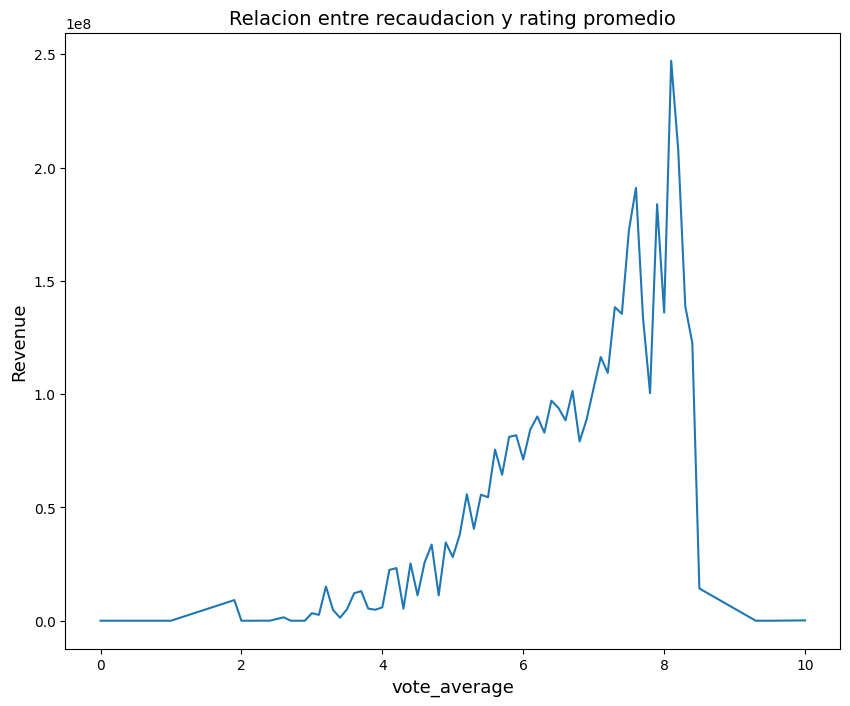

In [ ]:
vot_rev=dataClean.groupby('vote_average')['revenue'].mean()
vot_rev.plot(figsize = (10,8))
#title            
plt.title("Relacion entre recaudacion y rating promedio",fontsize=14)            
plt.xlabel('vote_average',fontsize = 13)
plt.ylabel('Revenue',fontsize = 13)
#max_value
max_run= vot_rev.idxmax()

plt.show()

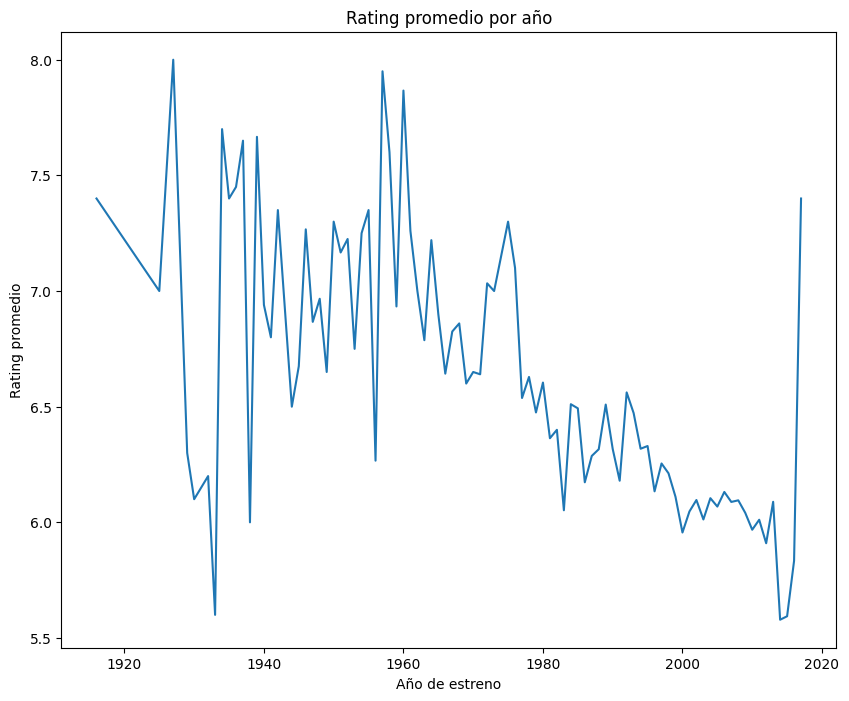

In [ ]:
rating_peryear = dataClean.groupby(dataClean["release_date"].dt.year)['vote_average'].mean()

ax = rating_peryear.plot(stacked=True, figsize=(10,8))
ax.set(xlabel='Año de estreno', ylabel='Rating promedio', title = 'Rating promedio por año')
plt.show()


### 4.8 Total revenue vs Release_year

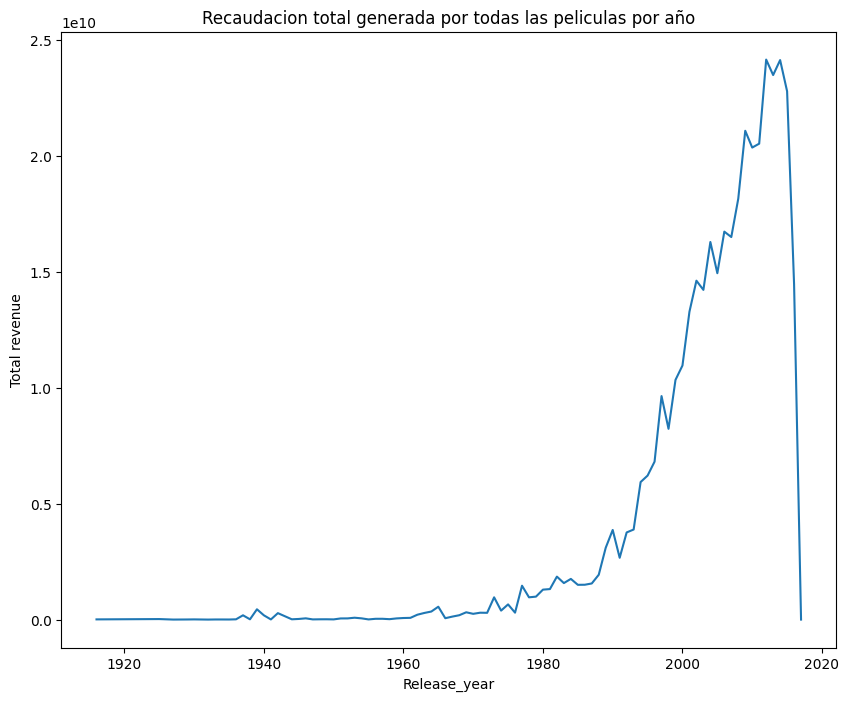

La industria del cine tuvo su maxima recaudacion en 2012


In [ ]:
revenue_peryear = dataClean.groupby(dataClean["release_date"].dt.year)['revenue'].sum()

ax = revenue_peryear.plot(stacked=True, figsize=(10,8));
ax.set(xlabel='Release_year', ylabel='Total revenue', title = 'Recaudacion total generada por todas las peliculas por año')
plt.show()

max_revenue= revenue_peryear.idxmax()

print('La industria del cine tuvo su maxima recaudacion en', max_revenue)